# PROBLEM DEFINITION

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. 
Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set.
Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. 
The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados.
Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold

 

The dataset can be seen in two angles to find the city or region and find the average price .

Task: Classification /Regression.
    
>FROM THIS ABOVE INFORMATION WE INFER THAT WE HAVE TO TEST AND TRAIN THE GIVEN DATA-SET ON THE BASIS OF BOTH REGRESSION AND CLASSIFICATION.

   > 1.REGRESSION : AVERAGE PRICE
   
   > 2.CLASSIFICATION : REGION


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df=pd.read_csv("avacado_data.csv")
df.head()

,S.no,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# DATA ANALYSIS

In [3]:
df.columns

Index(['S.no', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   S.no          1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


In [5]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [6]:
df["type"].unique()

array(['conventional'], dtype=object)

In [7]:
df["Date"].unique()

array(['27-12-2015', '20-12-2015', '13-12-2015', '06-12-2015',
       '29-11-2015', '22-11-2015', '15-11-2015', '08-11-2015',
       '01-11-2015', '25-10-2015', '18-10-2015', '11-10-2015',
       '04-10-2015', '27-09-2015', '20-09-2015', '13-09-2015',
       '06-09-2015', '30-08-2015', '23-08-2015', '16-08-2015',
       '09-08-2015', '02-08-2015', '26-07-2015', '19-07-2015',
       '12-07-2015', '05-07-2015', '28-06-2015', '21-06-2015',
       '14-06-2015', '07-06-2015', '31-05-2015', '24-05-2015',
       '17-05-2015', '10-05-2015', '03-05-2015', '26-04-2015',
       '19-04-2015', '12-04-2015', '05-04-2015', '29-03-2015',
       '22-03-2015', '15-03-2015', '08-03-2015', '01-03-2015',
       '22-02-2015', '15-02-2015', '08-02-2015', '01-02-2015',
       '25-01-2015', '18-01-2015', '11-01-2015', '04-01-2015',
       '25-12-2016', '18-12-2016', '11-12-2016', '04-12-2016',
       '27-11-2016', '20-11-2016', '13-11-2016', '06-11-2016',
       '30-10-2016', '23-10-2016', '16-10-2016', '09-10

--ACQUIRING STATISTICAL DATA

In [8]:
df.describe()

,S.no,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [9]:
df.drop(["S.no","Total Bags","Small Bags","Large Bags","XLarge Bags","type","Date"],axis=1,inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,2015,Albany
...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,2016,Charlotte
1513,1.51,178235.75,43325.87,52189.61,19419.57,2016,Charlotte
1514,1.48,178410.82,46364.75,52893.38,16736.92,2016,Charlotte
1515,1.47,189131.52,54110.79,53593.58,17495.42,2016,Charlotte


> In the above table we have removed all the unwanted attributes which wont majorly affect the quality of the given data-set and also the prediction accuracy of our machine learning models

In [10]:
df.shape

(1517, 7)

Finding NaN Values

In [11]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
year            0
region          0
dtype: int64

In [12]:
df["year"].unique()

array([2015, 2016], dtype=int64)

In [13]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

# Encoding the required Datas

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for columns in df.columns:
    df["year"]=le.fit_transform(df["year"])
    df["region"]=le.fit_transform(df["region"])
df    

,AveragePrice,Total Volume,4046,4225,4770,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,0,0
1,1.35,54876.98,674.28,44638.81,58.33,0,0
2,0.93,118220.22,794.70,109149.67,130.50,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,0,0
4,1.28,51039.60,941.48,43838.39,75.78,0,0
...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,1,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,1,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,1,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,1,7


>Here the datas have been encoded with the help of the Lable encoder.

>where, 2015 - 0 ; 2016 - 1
        
>also, the regions have been mapped with 0-7 accordingly.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   year          1517 non-null   int64  
 6   region        1517 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 83.1 KB


> we can see that all the data tyes have been changed to numerical values for better Data-Analysis.

# EXPLORATORY DATA ANALYSIS(EDA) AND PRE-PROCESSING PIPELINE

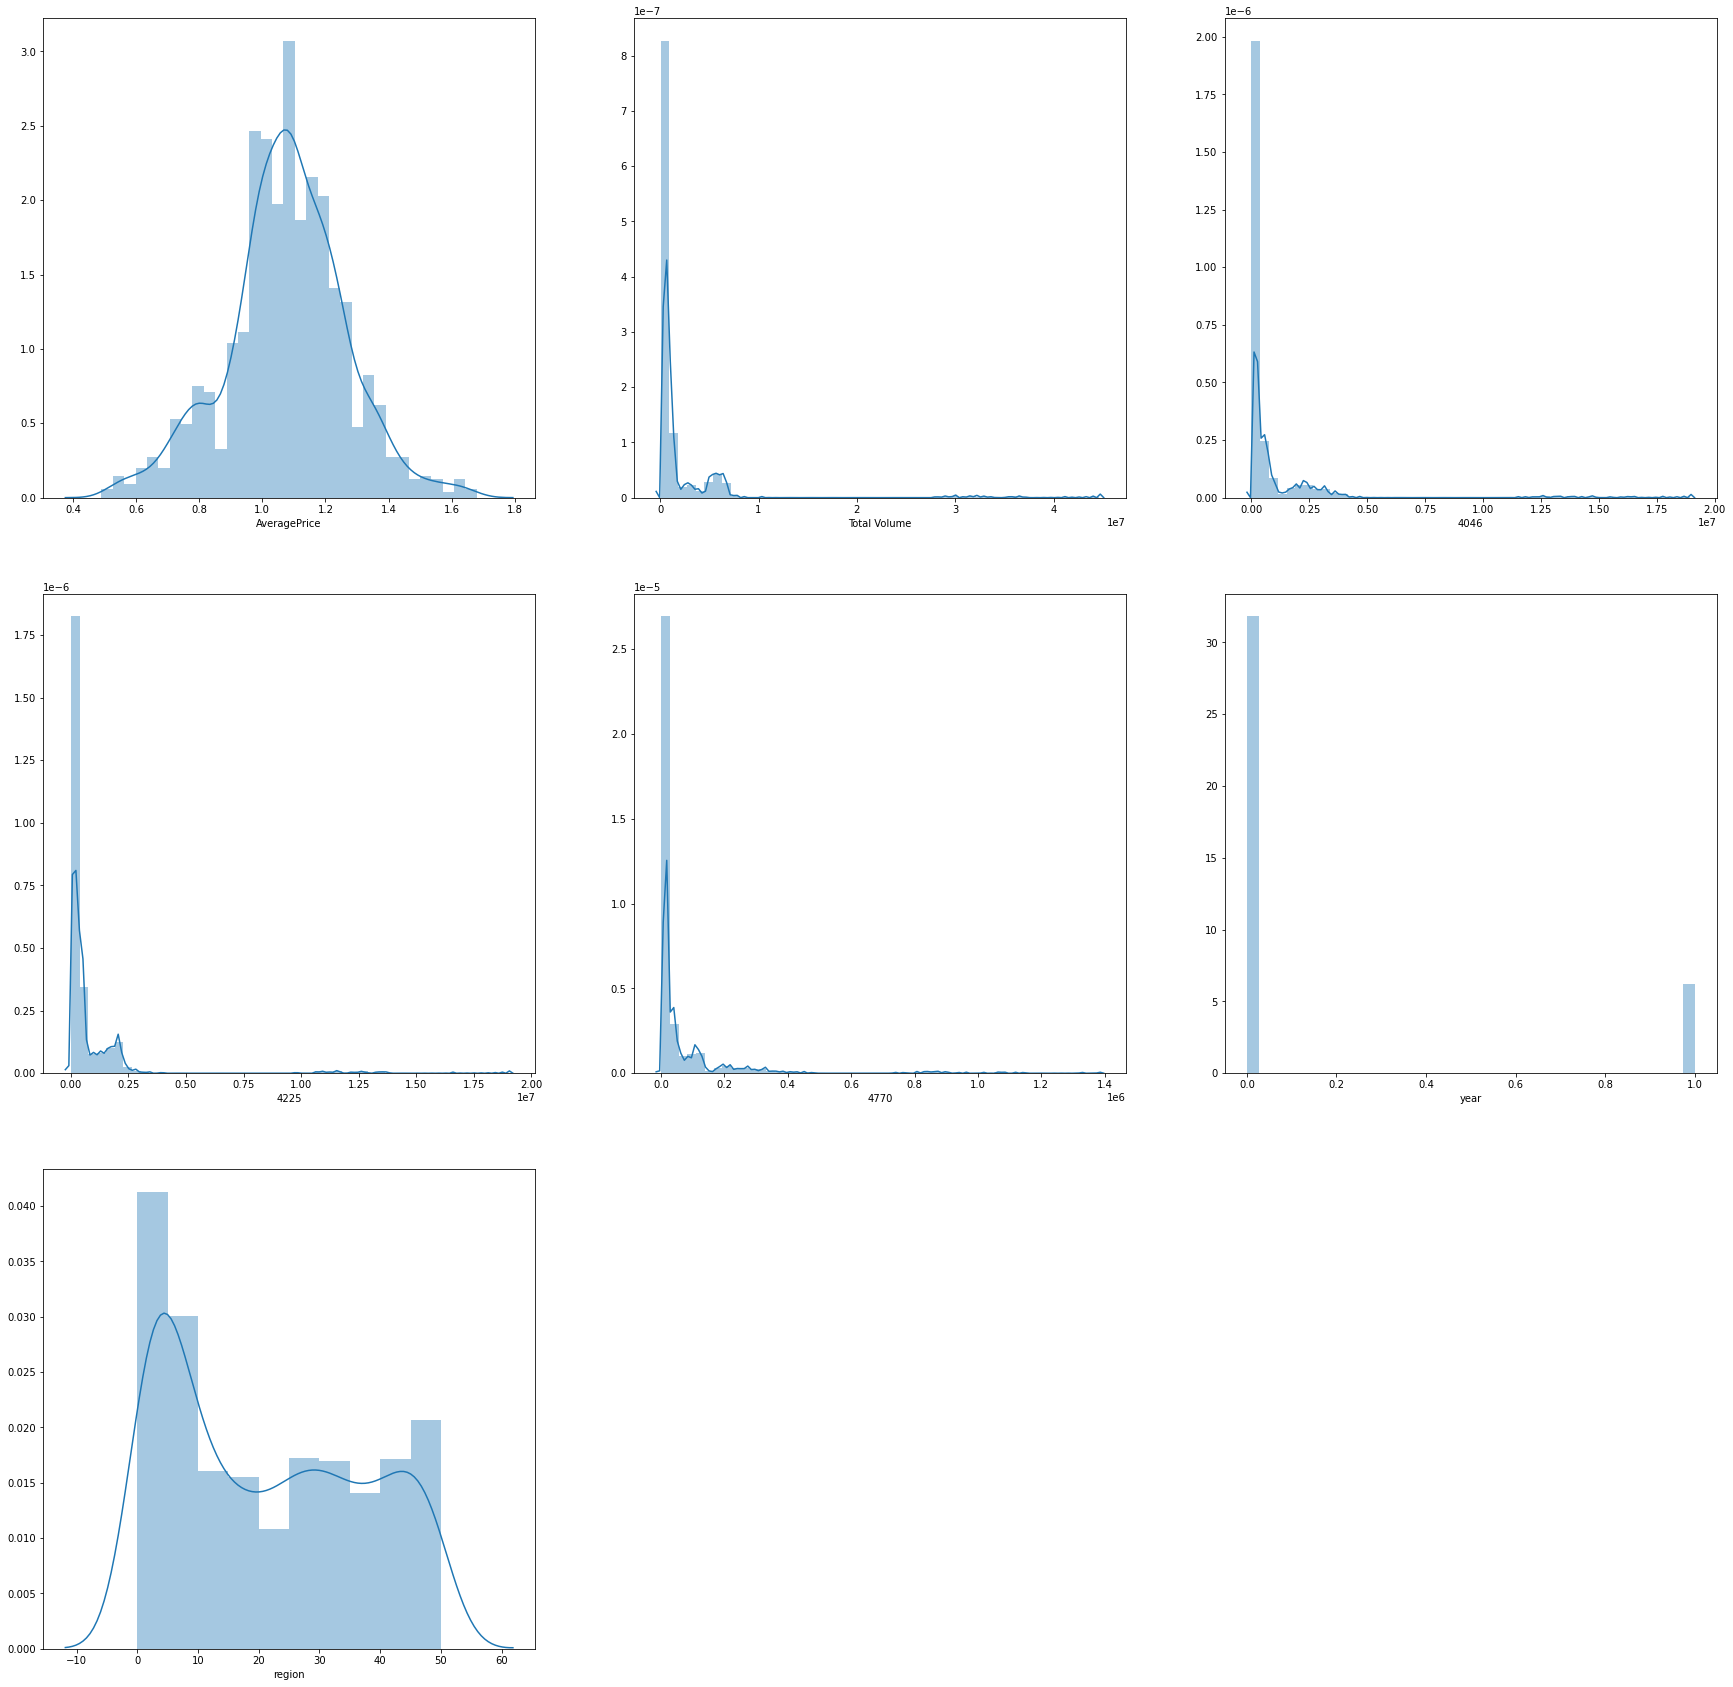

In [16]:
#univariate analysis
collist=df.columns.values
ncol=3
nrow=3
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sn.distplot(df[collist[i]])


Observations:

    1.Average price is normally distributed.
    
    2.Except for the Average price all the other attributes are positively skewed.

In [17]:
#BI-VARIATE ANALYSIS

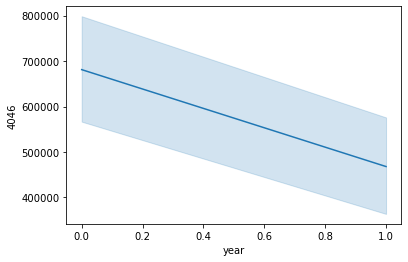

In [18]:
sn.lineplot(x="year",y="4046",data=df)

> The PLU 4046 has been sold more in 2015 than in 2016.

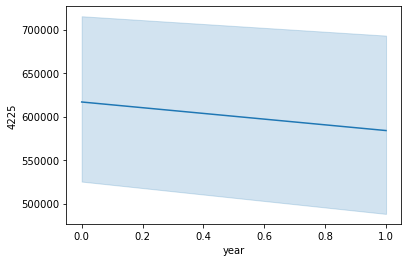

In [19]:
sn.lineplot(x="year",y="4225",data=df)

> The PLU 4225 has been sold more in 2015 than in 2016.

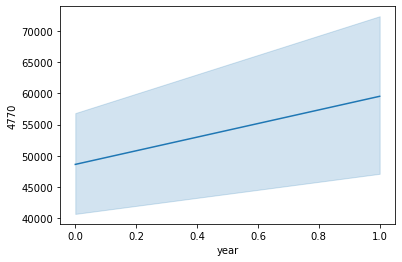

In [20]:
sn.lineplot(x="year",y="4770",data=df)

> The PLU 4770 has been sold more in 2016 than in 2015.

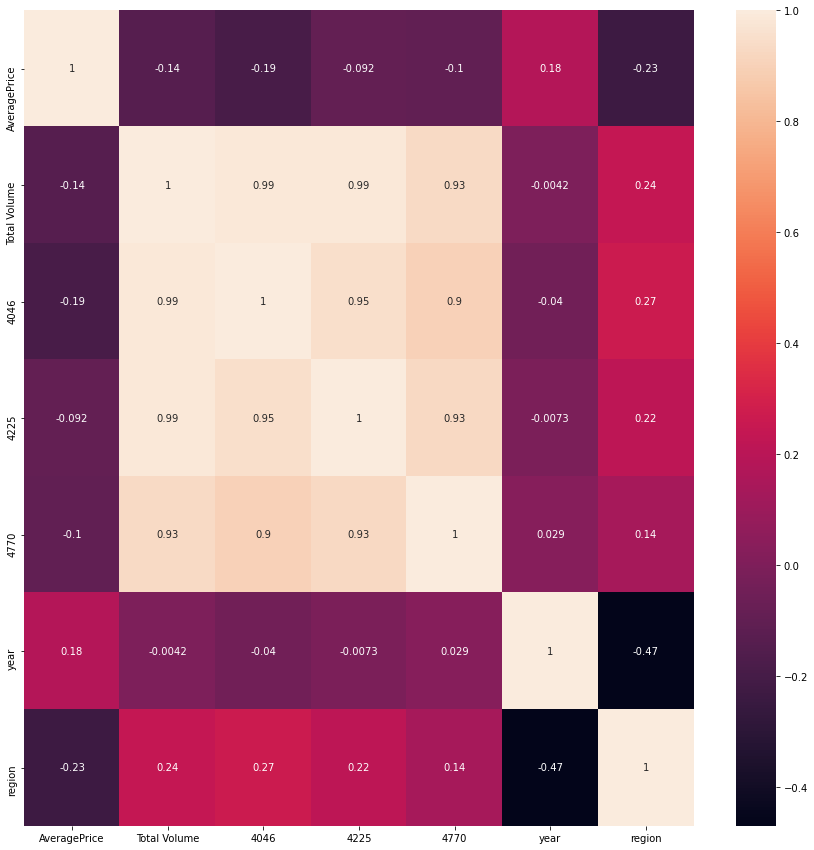

In [21]:
corr=df.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corr,annot=True)

KEY OBSERVATIONS:
    1. we could see that the total volume ,4046,4225,4770 are correlating positively each other.
    
    2.Average price is negatively correlating with region,4770,4225,4046 and total volume. 
      It is positively correlating with year.
    
    3.whereas region is positively correlating with total volume,4046,4225,4770 and
      negatively correlating with average price & year.

# Finding Skewness in the given Data-set

In [22]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
year            1.828332
region          0.288146
dtype: float64

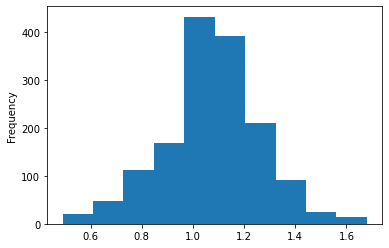

In [23]:
#Graphival representation of skewdness
df["AveragePrice"].plot.hist()

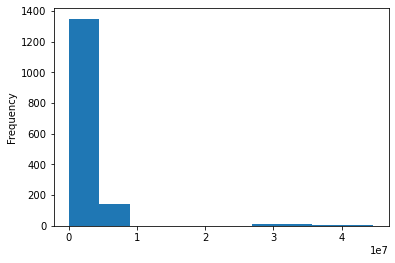

In [24]:
df["Total Volume"].plot.hist()

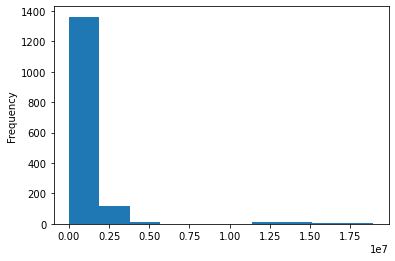

In [25]:
df["4046"].plot.hist()

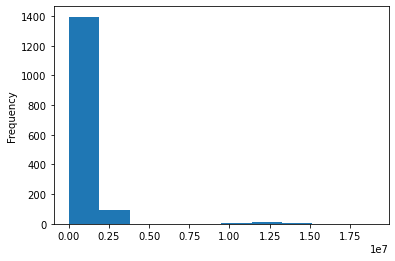

In [26]:
df["4225"].plot.hist()

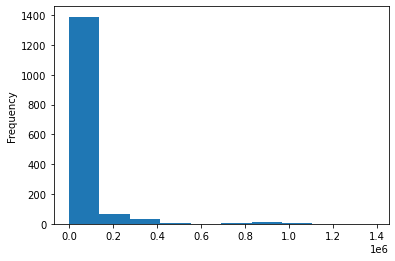

In [27]:
df["4770"].plot.hist()

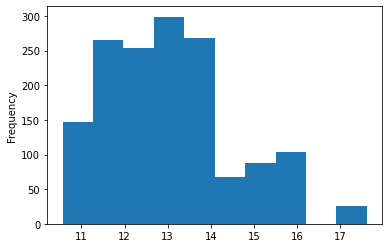

In [28]:
#removing skewness using boxcox
from scipy.stats import boxcox
df["Total Volume"]=boxcox(df["Total Volume"],0) #0 represents log transform
df["Total Volume"].plot.hist()

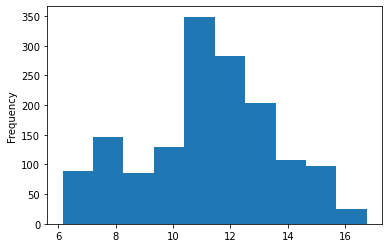

In [29]:
df["4046"]=boxcox(df["4046"],0) #0 represents log transform
df["4046"].plot.hist()

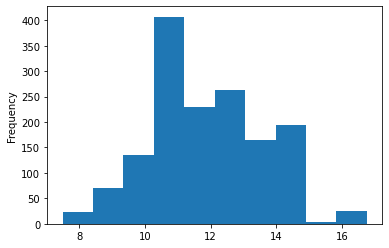

In [30]:
df["4225"]=boxcox(df["4225"],0) #0 represents log transform
df["4225"].plot.hist()

# PLOTTING OUTLIERS

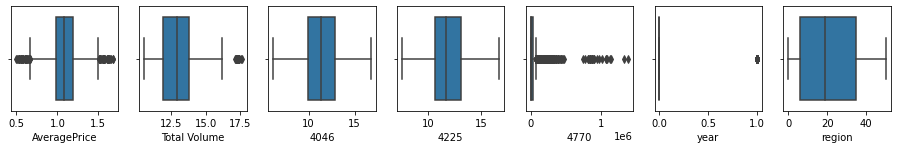

In [31]:
collist=df.columns.values
ncol=11
nrow=11
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sn.boxplot(df[collist[i]])

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.35048079, 1.35676542, 1.82835304, ..., 0.3656081 , 0.44100815,
        1.3143384 ],
       [1.45639674, 1.46639257, 2.01246553, ..., 0.36553427, 0.44100815,
        1.3143384 ],
       [0.76783831, 0.93213935, 1.94214044, ..., 0.36501029, 0.44100815,
        1.3143384 ],
       ...,
       [2.14485045, 0.64565172, 0.20183865, ..., 0.24444312, 2.26753179,
        0.88028586],
       [2.09189247, 0.60502956, 0.13571848, ..., 0.2389362 , 2.26753179,
        0.88028586],
       [1.88006056, 0.62805431, 0.23292521, ..., 0.24569922, 2.26753179,
        0.88028586]])

# REMOVING OUTLIERS

In [33]:
threshold=3
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,year,region
0,1.33,11.070329,6.943836,10.905127,48.16,0,0
1,1.35,10.912849,6.513645,10.706359,58.33,0,0
2,0.93,11.680304,6.677965,11.600475,130.50,0,0
3,1.08,11.277104,7.031741,11.184094,72.58,0,0
4,1.28,10.840357,6.847453,10.688265,75.78,0,0
...,...,...,...,...,...,...,...
1512,1.39,12.159222,10.960046,10.939633,17531.78,1,7
1513,1.51,12.090862,10.676505,10.862639,19419.57,1,7
1514,1.48,12.091844,10.744295,10.876033,16736.92,1,7
1515,1.47,12.150198,10.898789,10.889185,17495.42,1,7


# PREPARING DATA-SET FOR TRAINING AND TESTING - REGRESSION

In [34]:
# SPLITIING THE DATA FOR TESTING AND TRAINING
x=df.drop("AveragePrice",axis=1)
y=df["AveragePrice"]

In [35]:
#USING STANDARD SCALER FOR STANDARDISING THE DATA-SET
from sklearn.preprocessing import StandardScaler
stc=StandardScaler()
x=stc.fit_transform(x)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [37]:
x_train.shape

(1061, 6)

In [38]:
y_train.shape

(1061,)

In [39]:
x_test.shape

(456, 6)

In [40]:
y_test.shape

(456,)

# BUILIDING MACHINE LEARNING MODELS

# MACHINE LEARNING MODEL - REGRESSION

MACHINE LEARNING MODELS
For the above data-set we will use

1.LINEAR REGRESSION

2.SGD 

3.RANDOM FOREST

In [41]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=80.63597073879801,cross_value_score=74.80159363993559,and difference=5.834377098862419


In [42]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=30.905235853965983,cross_value_score=28.537132313629094,and difference=2.3681035403368895


In [43]:
#SGD REGRESSOR
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=30.905235853965983,cross_value_score=28.537132313629094,and difference=2.3681035403368895


# HYPERTUNING THE MACHINE LEARNING MODEL - REGRESSION

In [44]:
#creating parameter list to pass in gridsearch CV
parameters={"criterion":["mae"],"n_estimators":[200]}

In [45]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(rf,parameters,cv=5,scoring="r2")
GCV.fit(x_train,y_train)
GCV.best_estimator_#finding best estimator
GCV_pred=GCV.best_estimator_.predict(x_test)
print("final accuracy = ",r2_score(y_test,GCV_pred)*100)

final accuracy =  80.75910156108111


# NOW WE CAN SEE THAT FROM THE ABOVE REGRESSION MACHINE LEARNING MODELS "RANDOM FOREST REGRESSOR" HAS A HIGHEST ACCURACY RATE OF 80.7% WITH A VERY NEGLIGIBLE DIFFERENCE BETWEEN ACCURACY AND CROSS VALUE SCORE. 

# COMPARING THE ORIGINAL AND PREDICTED DATAS

In [46]:
a=np.array(y_test)
predicted=np.array(y_pred)
new=pd.DataFrame({"original":a,"predicted":predicted})
new.head()

,original,predicted
0,1.18,1.201690
1,1.25,1.235478
2,1.08,0.985855
3,1.07,1.019988
4,1.22,1.226585


# SAVING THE DATA-SET FOR PRODUCTION - REGRESSION

In [47]:
import joblib 
joblib.dump(rf,"avacado_data-set.pkl")

['avacado_data-set.pkl']

# PREPARING DATA-SET FOR TRAINING AND TESTING - CLASSIFICATION

In [48]:
xc=df.drop("region",axis=1)
yc=df["region"]

In [49]:
#USING STANDARD SCALER FOR STANDARDISING THE DATA-SET
from sklearn.preprocessing import StandardScaler
stc=StandardScaler()
xc=stc.fit_transform(xc)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
xc_train,xc_test,yc_train,yc_test=train_test_split(xc,yc,test_size=.3,random_state=42)

In [51]:
xc_train.shape

(1061, 6)

In [52]:
yc_train.shape

(1061,)

In [53]:
xc_test.shape

(456, 6)

In [54]:
yc_test.shape

(456,)

# MACHINE LEARNING MODEL - CLASSIFICATION


MACHINE LEARNING MODELS
For the above data-set we will use

1.LOGISTIC REGRESSION

2.NAIVES BAYES CLASSIFICATION

3.RANDOM FOREST


In [55]:
#Logictic Regression
lgc=LogisticRegression()
lgc.fit(xc_train,yc_train)#for Training purpose
lgc_pred=lgc.predict(xc_test)#for Testing purpose
print(lgc_pred)
print("\nAccuracy score : ",accuracy_score(yc_test,lgc_pred))
print("\nConfussion matrix : ",confusion_matrix(yc_test,lgc_pred))
print("\nclassification report : ",classification_report(yc_test,lgc_pred))

[ 4  0  6  6  0  1 38 47  3  6  1 19  0  1 14  3  3 38  2  0 49  2  9 46
 37 31  9 50  8 17  7 48  4  9 17  5 30 38 25 38  2 16  5 12 42 22  7 38
  3 13  4 12  7 22 49 28  2  1 36  8  8 28 46  0 19 49 31 44 31 38  4 17
  9  1 25  6 12 27 45 42 19 31  0 31 25 17 49 31 44 26 14  5 44 12  2 22
  0 26  6 38  7  1  6  1 47 48  1 19  3 28 44  5 28  2 31  2 14  2 45 49
  3  6  0  1 46 31  0 11  3 38 30  2 17  6 31 45  4  8  1 26  4 13  3  0
 26 19 31  7 44  2 19 31 34 38  4 38 33 11 31  9 49 12  5  1  2 42 31 19
 22 30 12 50  6  2 19  2 44 43  6 23 49  7  4 28  2 38 44 26  3 31 31 49
 12  9  0 38  3 45 28 17  1 45 14 25  1  7  4  1  9  6  2 12 23  9 38 48
  6  6  6 12  1 38 34  9 31 44  6 42 23 26 42  6 44 49  9 22  7  7  0  1
  2  9 31 25 14 42 42  1  3  3 17 42 25 36 47  2  3 19 19 35 49 30 44 19
 13  1 34 19  3  8 14 17  6  9 19 12 12 34 19  1  7 13 14 45 48 33 49 38
 33  1 47  9 31  8 17  6  5  1  5 12 47  2  1  0  1  6  0 26  2  0 22 36
 45 19 12  7  4  0 12 44 19 43 49 31  4 26 46  9 11

In [56]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
rfcl=RandomForestRegressor()
rfcl.fit(xc_train,yc_train)
yc_pred=rfcl.predict(xc_test)
r2score=r2_score(yc_test,yc_pred)
cvscore=cross_val_score(RandomForestRegressor(),xc_train,yc_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=85.44970911351972,cross_value_score=86.11009975442163,and difference=-0.6603906409019089


In [57]:
#Finding best parameters for DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
parameters={"criterion":["mse","friedman_mse","mae"],"splitter":["best","random"]}
dr=DecisionTreeRegressor()
clf=GridSearchCV(dr,parameters)
clf.fit(xc_train,yc_train)
print(clf.best_params_)

{'criterion': 'mae', 'splitter': 'best'}


In [58]:
#DecisionTreeRegressor Method
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
rf=DecisionTreeRegressor(criterion="friedman_mse",splitter="best")
rf.fit(xc_train,yc_train)
rf.score(xc_train,yc_train)
pred=rf.predict(xc_test)
pred
r2score=r2_score(yc_test,pred)
cvscore=cross_val_score(rf,xc_train,yc_train,cv=5).mean()
print( f"Accuracy={r2score*100},\ncross_value_score={cvscore*100},\nand difference={(r2score*100)-(cvscore*100)}")

Accuracy=62.95358965406004,
cross_value_score=73.99362729245185,
and difference=-11.040037638391809


# HYPERTUNING THE MACHINE LEARNING MODEL - CLASSIFICATION

In [59]:
#creating parameter list to pass in gridsearch CV
parameters={"criterion":["mae"],"n_estimators":[200]}

In [60]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(rfcl,parameters,cv=5,scoring="r2")
GCV.fit(xc_train,yc_train)
GCV.best_estimator_#finding best estimator
GCV_pred=GCV.best_estimator_.predict(xc_test)
print("final accuracy = ",r2_score(yc_test,GCV_pred)*100)

final accuracy =  86.06798351771312


# NOW WE CAN SEE THAT FROM THE ABOVE CLASSIFICATION MACHINE LEARNING MODELS "RANDOM FOREST REGRESSOR" HAS A HIGHEST ACCURACY RATE OF 86.0% WITH A VERY NEGLIGIBLE DIFFERENCE BETWEEN ACCURACY AND CROSS VALUE SCORE.

# COMPARING THE ORIGINAL AND PREDICTED DATAS

In [61]:
a=np.array(yc_test)
predicted=np.array(yc_pred)
new=pd.DataFrame({"original":a,"predicted":predicted})
new.head(4)

,original,predicted
0,28,26.97
1,32,28.39
2,6,6.00
3,6,6.00


# SAVING THE DATA-SET FOR PRODUCTION - CLASSIFICATION

In [62]:
import joblib 
joblib.dump(rfcl,"avacado_data-set_cl.pkl")

['avacado_data-set_cl.pkl']